# Линейная регрессия

![](https://habrastorage.org/files/256/a5d/ed0/256a5ded03274e0f87ccf97164c31c35.png)

## Теория

Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.

Пусть есть некоторый числовой целевой признак $y$. Извеcтны признаки $X = [x_1, x_2, ... ,x_m]$. Модель регрессии предсказывает $y$ с помощью вычисления следующей взвешенной суммы $y = w_0 + \sum_{i=1}^{m}{w_i x_i}$. Добавив фиктивный признак $x_0 = 1$, можно будет записать $y = \sum_{i=0}^m w_i x_i = \vec{w}^T \vec{x}$. Если представить себе X как матрицу объектов-признаков, y - вектор столбец целевой переменной, а w - вектор-столбец коэффициентов, то получим матричную цапись: $$\Large \vec{y} = X\vec{w}$$

Один из способов вычислить значения параметров модели является метод наименьших квадратов (МНК), который минимизирует среднеквадратичную ошибку между реальным значением зависимой переменной и прогнозом, выданным моделью:
$$
\large
\begin{array}
{rcl}\mathcal{L}\left(X, \vec{y}, \vec{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \vec{w}^T \vec{x}_i\right)^2 \\
&=& \frac{1}{2n} \left\| \vec{y} - X \vec{w} \right\|_2^2 \\
&=& \frac{1}{2n} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right)
\end{array}
$$

Для решения данной оптимизационной задачи необходимо вычислить производные по параметрам модели, приравнять их к нулю и решить полученные уравнения относительно $\vec w$ (частный случай был в лекции):

$$
\large
\begin{array}
{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\
&\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} = 0 \\
&\Leftrightarrow& X^T X \vec{w} = X^T \vec{y} \\
&\Leftrightarrow& \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}
\end{array}
$$

### Нормальное уравнение

Таким образом для аналитического вычисления весов линейной регрессии нужно решить это нормальное уравнение: $$\Large \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}$$

Матрица ${(X^TX)}^{-1}X^T$ - [псевдообратная](https://ru.wikipedia.org/wiki/%D0%9F%D1%81%D0%B5%D0%B2%D0%B4%D0%BE%D0%BE%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).
Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). На практике лучше находить вектор весов $w$ решением матричного уравнения $$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).
Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

### Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска. Градиентный шаг для весов будет выглядеть следующим образом: $$w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$$$ w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$ Здесь $\eta$ - параметр, шаг градиентного спуска.

### Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки: $$ w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$ $$ w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$ где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

#### Литература 
- [Первый конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture02-linregr.pdf)
- [Второй конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture03-linregr.pdf)
- [Теория из курса ODS](https://github.com/Yorko/mlcourse_open/blob/master/jupyter_notebooks/topic04_linear_models/topic4_linear_models_part1_mse_likelihood_bias_variance.ipynb)
- [Материалы из курса от МФТИ](https://www.coursera.org/specializations/machine-learning-data-analysis)
- [Статья про лин.рег. от ODS на habrahabr](https://habrahabr.ru/company/ods/blog/323890/)

В домашнем задании надо будет вычислить всё **вручную** методом нормального уравнения.

![](https://ebanoe.it/wp-content/uploads/2016/03/alkogolik-question-how-to-live.jpg)

## Практика

В этом заданиии мы будем использовать данные [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) по росту и весу 25 тысяч подростков.

![](http://wiki.stat.ucla.edu/socr/uploads/thumb/a/ae/SOCR_Data_Dinov_HeightWeight_062408_Fig1.jpg/150px-SOCR_Data_Dinov_HeightWeight_062408_Fig1.jpg)

In [62]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [63]:
colab = False  # you know the rules
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

In [64]:
METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462 # это константы конвертации метров в дюймы, килограмов в фунты

if colab:
    df = pd.read_csv('/content/drive/My Drive/Classroom/ML course Introduction/Data/weights_heights.csv.gz', index_col='Index')
else:
    df = pd.read_csv('../data/weights_heights.csv.gz', index_col='Index')
df['Height'] = df['Height'] / METER_TO_INCH
df['Weight'] = df['Weight'] / KILO_TO_POUND
df.head()

,Height,Weight
Index,,
1,1.670899,51.252597
2,1.816490,61.909672
3,1.762732,69.411917
4,1.732705,64.562328
5,1.721814,65.452141


### Визуализируем имеющиеся данные



<Axes: title={'center': 'Height (m.) distribution'}, ylabel='Frequency'>

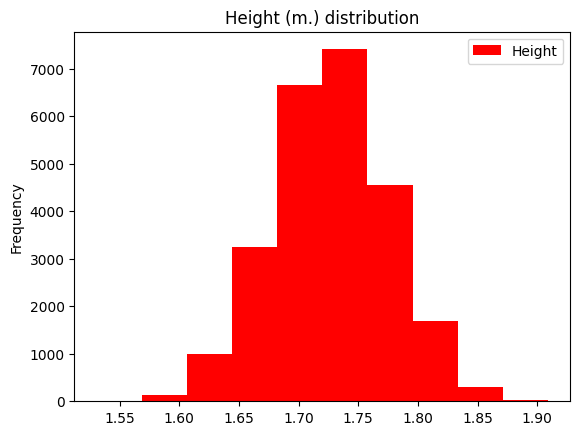

In [65]:
# Гистограмма значений роста
df.plot(y='Height', kind='hist', 
        color='red',  title='Height (m.) distribution')

<Axes: title={'center': 'Weight (kg.) distribution'}, ylabel='Frequency'>

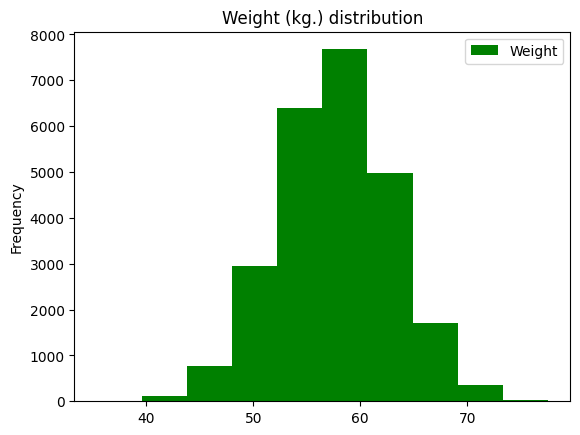

In [66]:
# Гистограмма значений веса
df.plot(y='Weight', kind='hist', 
        color='green',  title='Weight (kg.) distribution')

<Axes: title={'center': 'Height vs Weight'}, xlabel='Height', ylabel='Weight'>

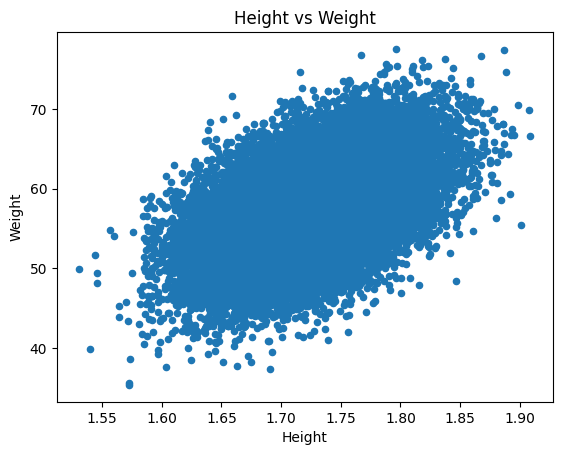

In [67]:
# посмотрим на scatter плот относительно роста и веса
# Видно что есть некоторая линейная зависимость между этими параметрами
df.plot(kind='scatter', y='Weight', x='Height', title='Height vs Weight')

Что можно сказать про эти данные по их графикам?

Распределение роста и веса подростков близко к нормальному. Большинство значений сосредоточено в центральной части гистограмм, что указывает на отсутствие сильных выбросов. Scatter plot показывает положительную корреляцию между ростом и весом: чем выше рост, тем больше вес.

### Среднеквадратичная ошибка

В простейшей постановке задача прогноза значения вещественного признака по прочим признакам (задача восстановления регрессии) решается минимизацией квадратичной функции ошибки.

В нашем случае у нас 2 признака поэтому будет два параметра $w_0$ и $w_1$

$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$

In [68]:
# Функция для вычисления ошибки
# def error(x0, x1, w0, w1):
#     return sum(map(lambda xi, yi: ((yi - (w0 + w1 * xi))**2), x0, x1))

Функция, изложенная выше работает правильно, но совсем не понятно, что там происходит

Давайте перепишем её в более простом и понятном виде

In [69]:
def error(x0, x1, w0, w1):
    return sum((y_i - (w0 + w1 * x_i)) ** 2 for x_i, y_i in zip(x0, x1))

Зафиксируем какие-нибудь значения `w0` и `w1`.  
Посмотрим как изменяется значение ошибки `error` в зависимости от `w0`,`w1`.

Если всё верно, то в нижней ячейке должны быть выведены числа `209.69670759713378` и `226.27746779896154`, с точностью до 8-10 знака после запятой

In [70]:
weight, height = df['Weight'], df['Height']
print(error(weight,height, 1.3, 0.006))
print(error(weight,height, 0.6, 0.02))

209.69670759713375
226.27746779896134


Нарисуем на scatter plot эти две прямые, чтобы посмотреть как они "улавливают" закономерность.  
Очевидно по w0, w1 можно задать уравнение прямой.

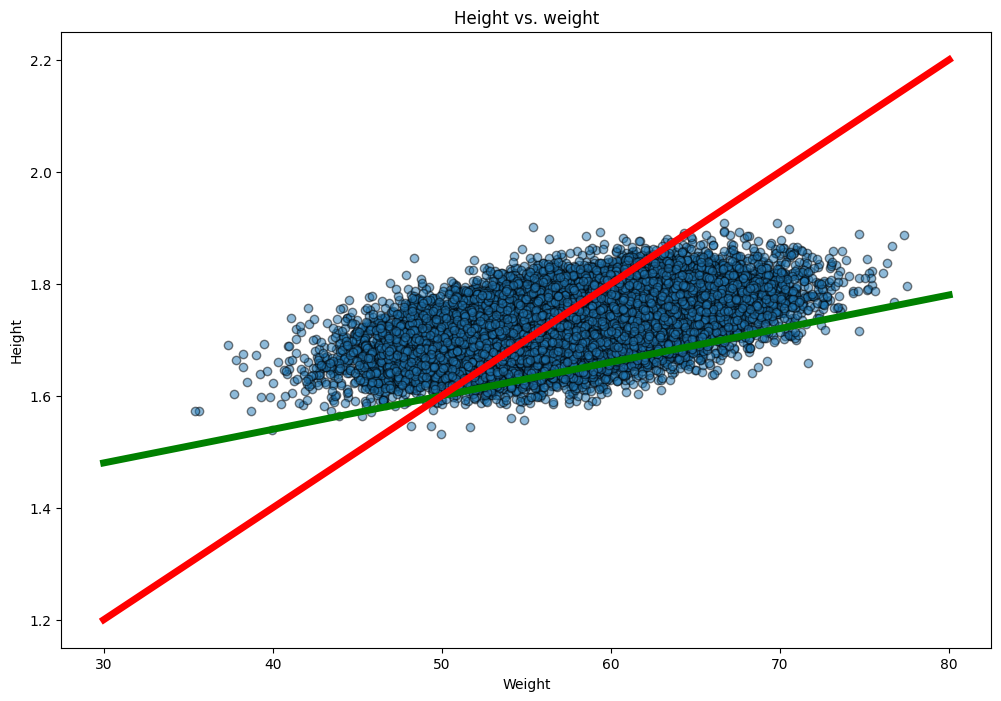

In [71]:
plt.figure(figsize=(12,8))
# alpha - это прозрачность точек, edgecolors - это цвет края точки
plt.scatter(x=weight, y=height, edgecolors='black', alpha=0.5)
plt.title('Height vs. weight')
plt.xlabel('Weight')
plt.ylabel('Height')
x = np.linspace(start=30.0, stop=80.0, num=100)
plt.plot(x, 1.3 + 0.006 * x, c='green', linewidth=5)
plt.plot(x, 0.6 + 0.02 * x, c='red', linewidth=5)

Минимизация квадратичной функции ошибки - относительная простая задача, поскольку функция выпуклая. Для такой задачи существует много методов оптимизации. Посмотрим, как функция ошибки зависит от одного параметра (наклон прямой), если второй параметр (свободный член) зафиксировать.

Text(0.5, 1.0, 'error vs. w1 for w0=50')

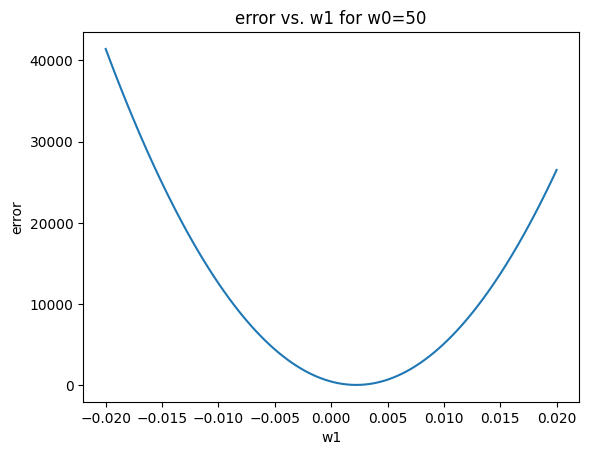

In [72]:
w0 = 1.6 # фиксируем свободный член
w1 = np.linspace(start=-0.02, stop=0.02, num=100) # перебираем значения w1

err = []
for w1_i in w1:
    err.append(error(weight, height, w0, w1_i))

plt.plot(w1, err)
plt.xlabel('w1')
plt.ylabel('error')
plt.title('error vs. w1 for w0=50')

Найдем оптимальное значение для $w_1$ при фиксированном $w_0 = 1.6$. Для этого воспользуемся методом `minimize_scalar`.

In [73]:
from scipy.optimize import minimize_scalar
w0 = 1.6
w1_opt = minimize_scalar(
    fun=lambda x: error(weight, height, w0, x), 
    bounds=(-0.2, 0.2)).x
w1_opt

np.float64(0.0022236793647382874)

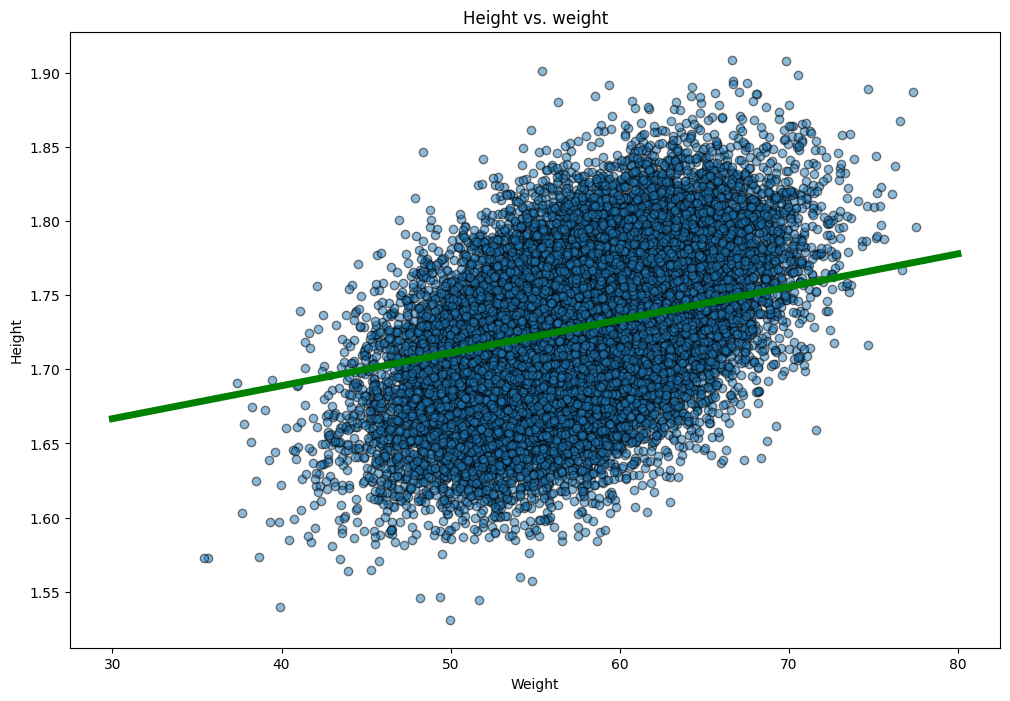

In [74]:
plt.figure(figsize=(12,8))

plt.scatter(x=weight, y=height, edgecolors='black', alpha=0.5)
plt.title('Height vs. weight')
plt.xlabel('Weight')
plt.ylabel('Height')

x = np.linspace(start=30.0, stop=80.0, num=100)
plt.plot(x, w0 + w1_opt * x, c='green', linewidth=5)

В прошлых графиках мы фиксировали $w_0$ и рисовали двумерные график ошибок. Но по сути мы должны перебирать и $w_0$ и $w_1$, а это трёхмерный график. Его тоже можно визулизировать. (Если вам нужны интерактивные графики, то посмотрите библиотеку [plotly](https://plotly.com/python)).

In [75]:
def error(x0, x1, w0, w1):  # вернём сложную и непонятную реализацию из-за её универсальности
    return sum(map(lambda xi, yi: ((yi - (w0 + w1 * xi))**2), x0, x1))

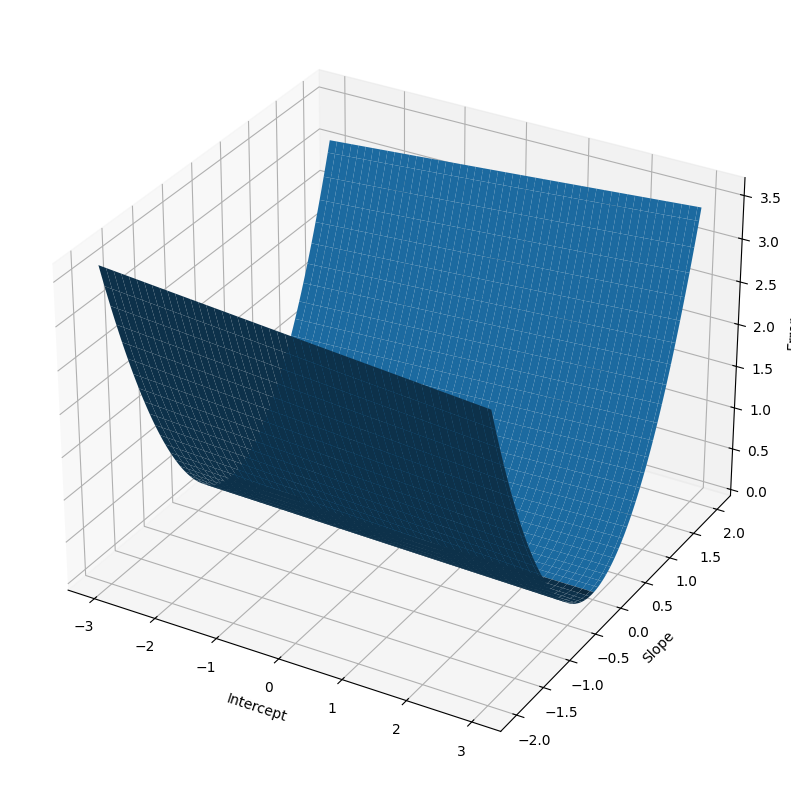

In [76]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')

w0 = np.linspace(start=-3, stop=3, num=100)
w1 = np.linspace(start=-2, stop=2, num=100)
w0, w1 = np.meshgrid(w0, w1)
z = error(weight, height, w0, w1)

ax.plot_surface(w0, w1, z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
pass

Теперь попробуем реализовать то же самое, только с помощью метода наименьших квадратов и для более общего случая.

Теория на этот счёт изложена в начале ноутбука.

Вспомним самое важное для нас.

Нормальное уравнение в матричной форме:

$$\Large X^TXw = X^Ty$$

Искомая часть для нас здесь $-$ переменная $w$. Это матрица, т.к. уравнение матричное.

Вычислить её можно с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html)

### Дополните реализацию линейной модели

In [77]:
class LeastSquaresRegression:
    # конструктор класса
    def __init__(self):
        # для ясности заранее объявим поле, по умолчанию оно пустое, но потом будет заполнено вычисленными весами
        self.w = None
        
    # магия, которая превращает наш объект в callable
    def __call__(self, x, *args, **kwargs):
        return self.predict(x)

    # этот метод вычисляет веса модели и записывает их в переменную w у текущего объекта
    def fit(self, x, y):
        #############
        #  Ваш код  #
        #############
        self.w = np.linalg.solve(X.T @ X, X.T @ y)  

    # этот метод производит вычисление y из уравнения выше (советую сначала вывести на бумаге)
    def predict(self, x):
        #############
        #  Ваш код  #
        #############
        return X @ self.w

Модель получилась максимально простой, поэтому для эмуляции свободного члена ($w_0$) нам понадобится модифицировать данные.

Раз уж мы решили, что рост откладывается на Oy, то давайте считать, что вес это Х.

**Создайте таблицу Х и задайте у неё два столбца - одно это вес из наших исходных данных, а второе это столбец полностью из единичек**

Убедитесь, что столбец с весом идёт первым.

In [78]:
X = df[['Weight']].copy()
X['Intercept'] = 1.0
X.head()

,Weight,Intercept
Index,,
1,51.252597,1.0
2,61.909672,1.0
3,69.411917,1.0
4,64.562328,1.0
5,65.452141,1.0


Теперь обучите Вашу самодельную модель и выведите её веса

In [79]:
clf = LeastSquaresRegression()

clf.fit(X, height)

print(clf.w)

[0.00459218 1.46232436]


Дальше идёт стадия проверки

Найдем минимум функции ошибки по трехмерной функции с помощью метода `minimize` и оптимизатора `L-BFGS-B`.

In [80]:
from scipy.optimize import minimize

(w0_opt, w1_opt) = minimize(
    fun=lambda x: error(weight, height, x[0], x[1]), 
    x0=(0, 0), 
    bounds=((-3, 3), (-2, 2)), 
    method='L-BFGS-B').x
print(f"w0_opt={w0_opt}\nw1_opt={w1_opt}")

w0_opt=1.4623582377201951
w1_opt=0.004591596531434728


Точки в нашем классификаторе и в ячейке сверху должны быть одинаковые. Иначе ошибка

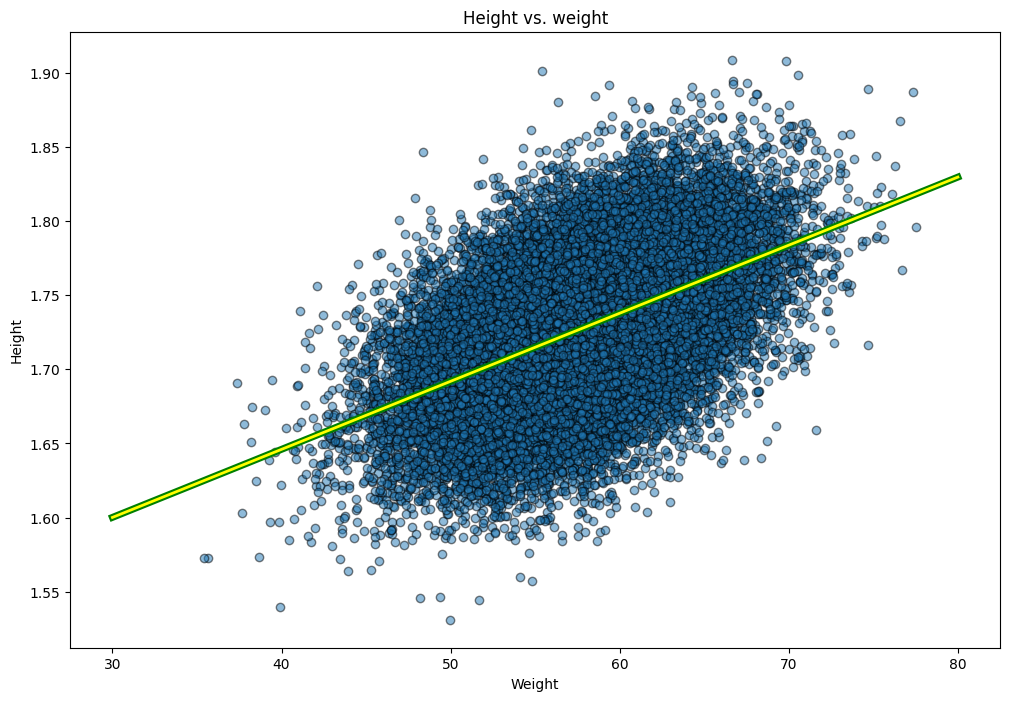

In [81]:
plt.figure(figsize=(12,8))

plt.scatter(x=weight, y=height, edgecolors='black', alpha=0.5)
plt.title('Height vs. weight')
plt.xlabel('Weight')
plt.ylabel('Height')

x = np.linspace(start=30.0, stop=80.0, num=100)
plt.plot(x, w0_opt + w1_opt * x, c='green', linewidth=5)
plt.plot(x, clf.w[1] + clf.w[0] * x, c='yellow', linewidth=2)

Если всё реализовано верно, то зелёная и жёлтая линии должны быть друг на друге

## Регуляризация Lasso и Ridge

Рассмотрим, как переобучаются линейные модели, почему так происходит, и выясним, как диагностировать и контролировать переобучение с помощью регуляризации.

Возьмем известный нам уже датасет о прокатах велосипедов. Его можно рассматривать в свете регрессии и предсказывать количество прокатов в зависимости от погоды.

```
season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
yr: 0 - 2011, 1 - 2012
mnth: от 1 до 12
holiday: 0 - нет праздника, 1 - есть праздник
weekday: от 0 до 6
workingday: 0 - нерабочий день, 1 - рабочий день
weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
temp: температура в Цельсиях
atemp: температура по ощущениям в Цельсиях
hum: влажность
windspeed(mph): скорость ветра в милях в час
windspeed(ms): скорость ветра в метрах в секунду
cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)
```

In [82]:
if colab:
    df = pd.read_csv('/content/drive/My Drive/Classroom/ML course Introduction/Data/bikes_rent.csv.gz')
else:
    df = pd.read_csv('../data/bikes_rent.csv.gz')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [83]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


Построим матрицу корреляций признаков, чтобы найти линейно зависимые признаки.  
Обратите внимание на то, что мы берем абсолютное значение корреляции. Нам не важно как коррелируют - положительно или отрицательно. Главное, что чем больше корреляция или антикорреляция, тем сильнее линейная связь между признаками.

In [84]:
# корреляционная матрица
corr = np.abs(df.corr())

In [85]:
# эта маска нужна для того, чтобы красиво вывести heatmap, без дублирования данных
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

<Axes: >

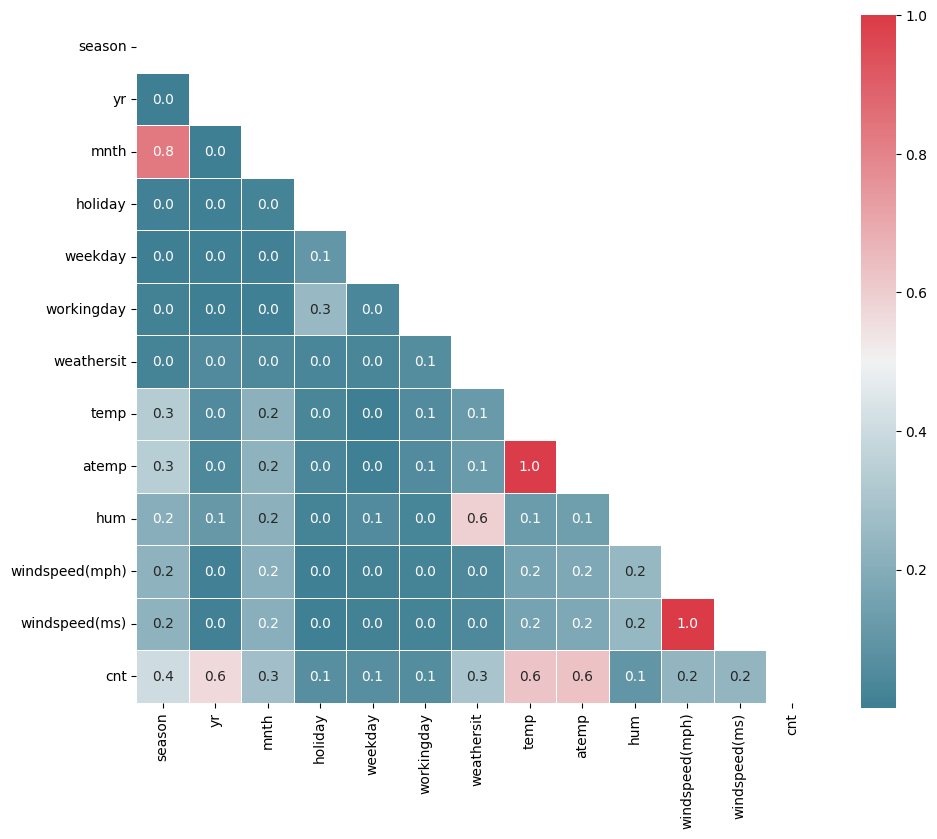

In [86]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=cmap, square=True,linewidths=.5, mask=mask,annot=True, fmt=".1f")

Судя по корреляционной матрице есть несколько признаков который сильно коррелируют с целевой переменной - числом прокатов (`cnt`):

- yr
- temp
- atemp
- season

Как мы помними в линейной регрессии используются взвешенные суммы признаков, поэтому все они должны быть одного масштаба. (Что бы избежать расхождения алгоритма градиентного спуска) Проверим, так ли это у нас.

In [87]:
df.mean()

season               2.496580
yr                   0.500684
mnth                 6.519836
holiday              0.028728
weekday              2.997264
workingday           0.683995
weathersit           1.395349
temp                20.310776
atemp               23.717699
hum                 62.789406
windspeed(mph)      12.762576
windspeed(ms)        5.705220
cnt               4504.348837
dtype: float64

Как мы видим все они разного масштаба, следовательно их требуется отмасштабировать. Можно использовать простой `sklearn.preprocessing.StandardScaler`. Суть его очень простая - приводить всё к нулевому среднему и масштабировать до единичного значения разброса. Получается такая формула для вычисления значения признака: 
$$x_i = \frac{x_i - mean(X)}{stdev(X)}$$

Тогда $Mean(X) = 0$ и $Stdev(X) = 1$

/tmp/ipykernel_10128/3154438954.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['temp'], hist=False)
/tmp/ipykernel_10128/3154438954.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['atemp'], hist=False)
/tmp/ipykernel_10128/3154438954.py:5: UserWarning: 

`distplo

<Axes: xlabel='hum', ylabel='Density'>

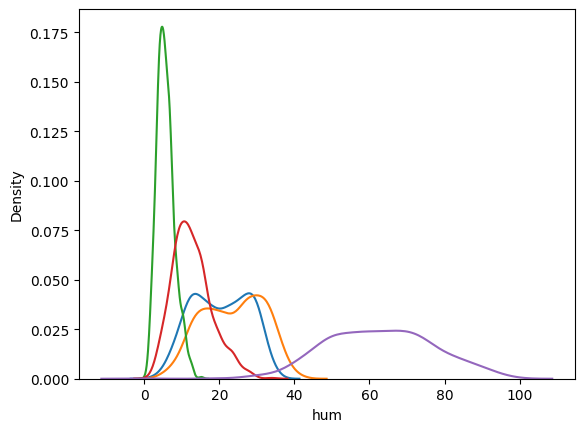

In [88]:
# Посмотим еще раз на изначальные распределения признаков

sns.distplot(df['temp'], hist=False)
sns.distplot(df['atemp'], hist=False)
sns.distplot(df['windspeed(ms)'], hist=False)
sns.distplot(df['windspeed(mph)'], hist=False)
sns.distplot(df['hum'], hist=False)
# и так далее

In [89]:
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

In [90]:
df = shuffle(df, random_state=42)
X = df.drop(['cnt'], axis=1)
y = df['cnt']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [91]:
X.mean(axis=0)

array([ 2.43003672e-16, -8.26212483e-17,  4.73857160e-17,  4.43481701e-17,
        2.79454222e-17, -1.16641762e-16, -3.15904773e-17, -1.16641762e-16,
       -2.52723818e-16,  3.20764847e-16, -1.16641762e-16,  3.40205140e-16])

In [92]:
X.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Как видим стандартное отклонение теперь единично, а среднее близко к нулю.

/tmp/ipykernel_10128/3096809037.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[:,i], hist=False)
/tmp/ipykernel_10128/3096809037.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X[:,i], hist=False)
/tmp/ipykernel_10128/3096809037.py:3: UserWarning: 

`distplot` is a d

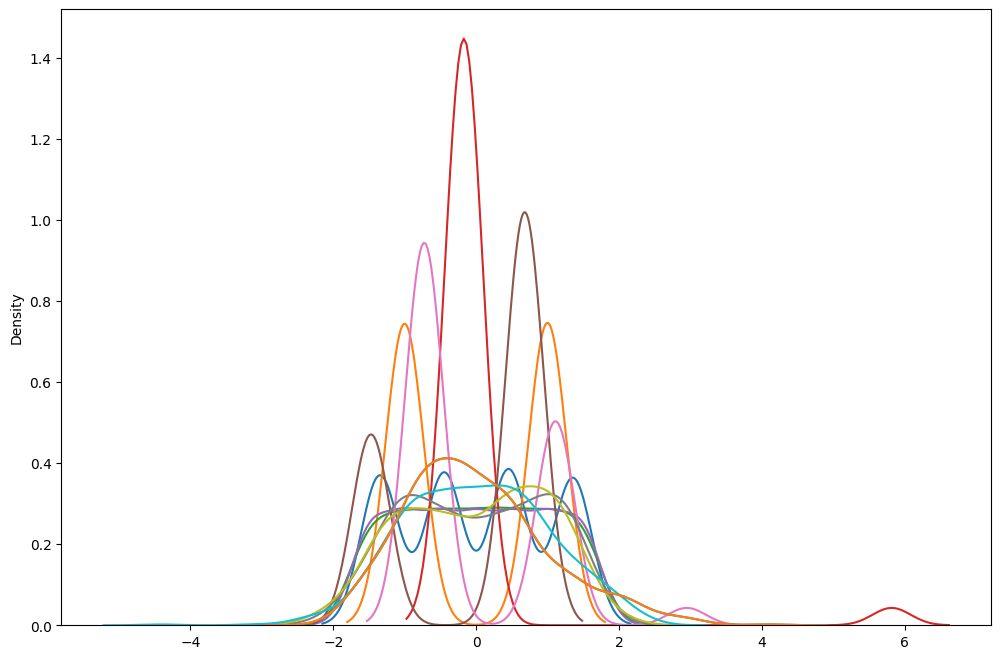

In [93]:
plt.figure(figsize=(12,8))
for i in range(0,12):
    sns.distplot(X[:,i], hist=False)

Теперь обучим линейную модель. В этот раз мы будем делать это не вручную, а использовать класс `LinearRegression`.

Воспользуемся им для начала без параметров, то есть со значениями по умолчанию.

In [94]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)  # обучение. Может выдать warning про LAPACK - всё ок
for coef, col in sorted(zip(lr.coef_, df.columns), key=lambda x: np.abs(x[0])):
    print("{} \t {}".format(np.round(coef, 4), col))

56.3919 	 workingday
-86.7593 	 holiday
137.2251 	 weekday
-141.3017 	 mnth
-145.6143 	 hum
-330.2265 	 weathersit
367.4837 	 temp
570.8638 	 season
585.5494 	 atemp
1021.9654 	 yr
12457138390688.885 	 windspeed(mph)
-12457138390887.346 	 windspeed(ms)


Посмотрим на магнитуду признаков, то есть на зхначения весов в линейной модели при каждом признаке. Мы помним, что чем , больше по модулю коэффициент, тем больше "веса" он имеет в модели и тем важнее признак.

<Axes: xlabel='coef', ylabel='columns'>

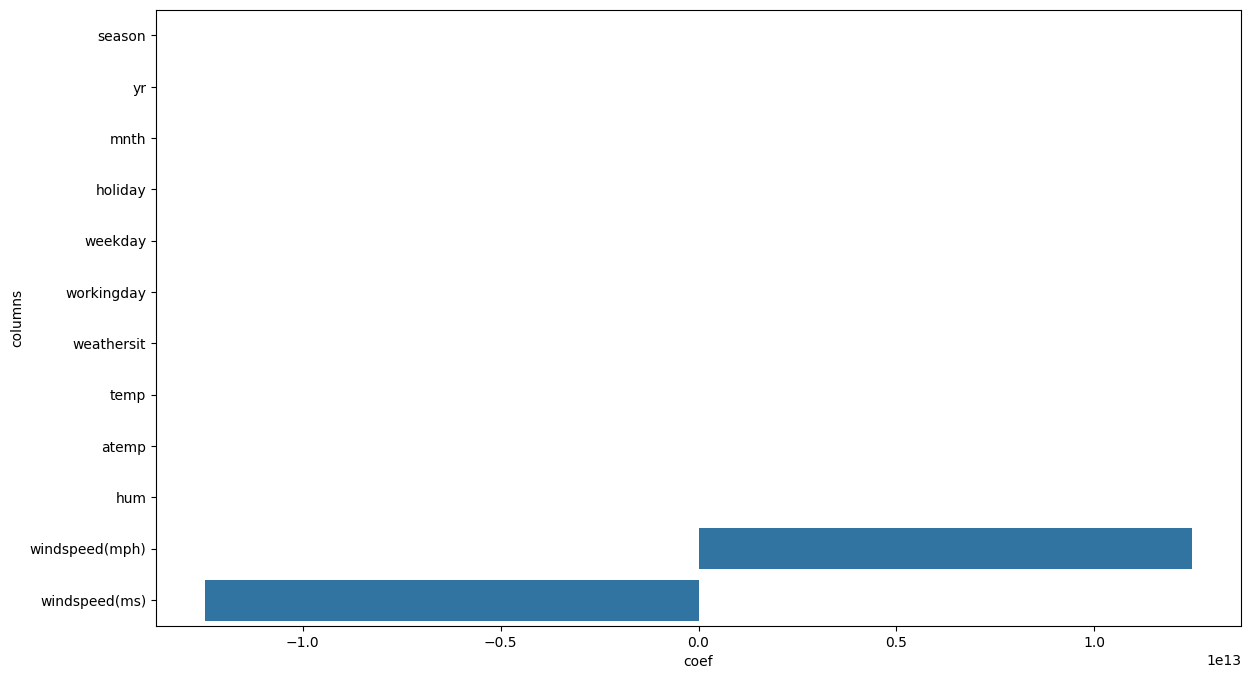

In [95]:
# Магнитуда признаков
plt.figure(figsize=(14,8))
sns.barplot(y='columns', x='coef',data=pd.DataFrame(list(zip(lr.coef_, df.columns)), columns=["coef", "columns"]))

Мы видим, что веса при линейно-зависимых признаках по модулю значительно больше, чем при других признаках.
Чтобы понять, почему так произошло, вспомним аналитическую формулу, по которой вычисляются веса линейной модели в методе наименьших квадратов: $w = (X^TX)^{-1} X^T y$.

Если в $X$ есть коллинеарные (линейно-зависимые) столбцы, матрица $X^TX$ становится вырожденной, и формула перестает быть корректной. Чем более зависимы признаки, тем меньше определитель этой матрицы и тем хуже аппроксимация $Xw \approx y$. Такая ситуацию называют проблемой мультиколлинеарности, мы обсуждали ее на лекции.

С парой `temp`-`atemp` чуть менее коррелирующих переменных такого не произошло, однако на практике всегда стоит внимательно следить за коэффициентами при похожих признаках.

Решение проблемы мультиколлинеарности состоит в регуляризации линейной модели. К оптимизируемому функционалу прибавляют $L_1$ или $L_2$ норму весов, умноженную на коэффициент регуляризации $\alpha$. В первом случае метод называется **Lasso**, а во втором – **Ridge**.

#### Lasso (L1)

$$\Large error(X, y, w) = \frac{1}{2} \sum_{i=1}^\ell {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=1}^d |w_i|$$, где $\alpha$ - это коэффициент регуляризации.

#### Ridge (L2)

$$\Large error(X, y, w) = \frac{1}{2} \sum_{i=1}^\ell {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=1}^d w_i^2$$, где $\alpha$ - это коэффициент регуляризации.

Для Ridge (Так же известного как регуляризация Тихонова) можно переформулировать матричное уравнение в нормальной форме:
$$\Large (X^TX - \lambda I)w = X^Ty$$
А для Lasso нужен координатный спуск. Про концепцию алгоритма вы можете почитать [здесь](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BF%D0%BE%D0%BA%D0%BE%D0%BE%D1%80%D0%B4%D0%B8%D0%BD%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%81%D0%BF%D1%83%D1%81%D0%BA%D0%B0).

---

Рассмотрим на примере как разная регуляризация влияет на веса $w$ модели.

Попробуем реализовать Ridge руками

In [96]:
class Ridge(LeastSquaresRegression):
    def __init__(self, alpha=0.1):
        super(Ridge, self).__init__()
        self.alpha = alpha

    def fit(self, x, y):
        #############
        #  Ваш код  #
        #############
        I = np.eye(X.shape[1])
        self.w = np.linalg.solve(X.T @ X + self.alpha * I, X.T @ y)

55.9502 	 workingday
-86.6992 	 holiday
-99.0604 	 windspeed(mph)
-99.0604 	 windspeed(ms)
-134.2018 	 mnth
138.3231 	 weekday
-145.019 	 hum
-332.6628 	 weathersit
372.9091 	 temp
565.5928 	 season
580.1126 	 atemp
1020.2102 	 yr


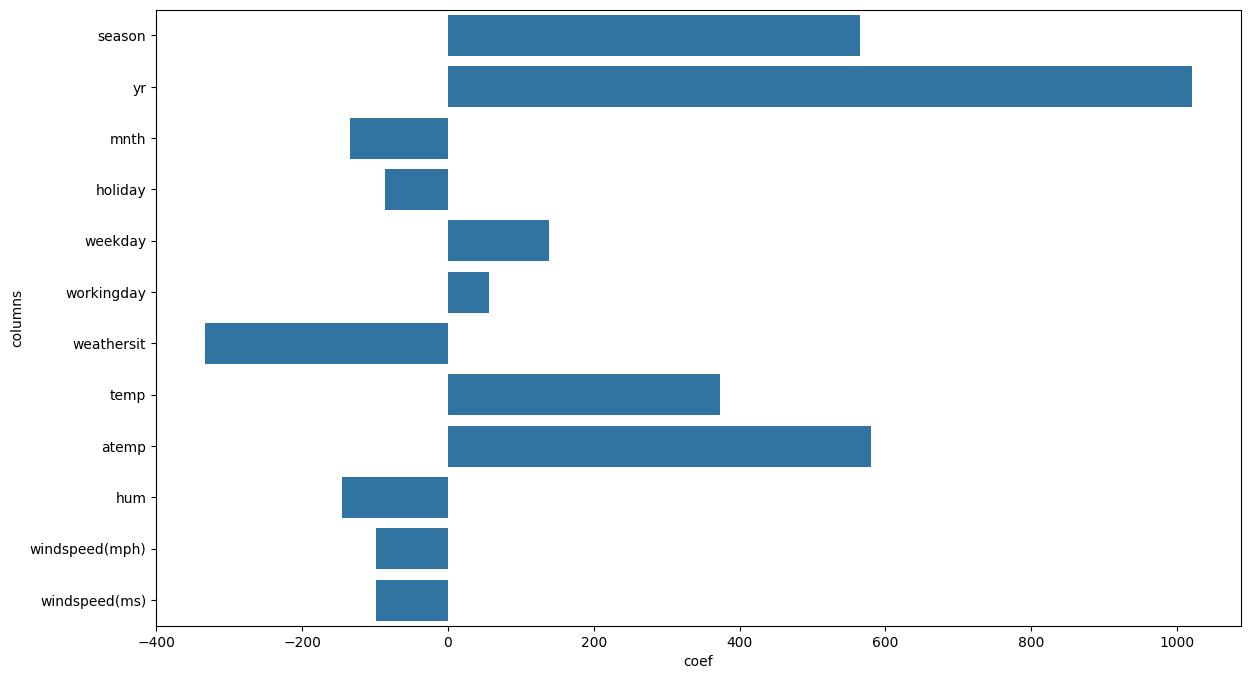

In [97]:
ridge = Ridge()
ridge.fit(X, y)

for coef, col in sorted(zip(ridge.w, df.columns), key=lambda x: np.abs(x[0])):
    print("{} \t {}".format(np.round(coef, 4), col))
    
# Магнитуда признаков
plt.figure(figsize=(14,8))
sns.barplot(y='columns', x='coef',data=pd.DataFrame(list(zip(ridge.w, df.columns)), columns=["coef", "columns"]))
pass

Теперь сравните наш Ridge с библиотечным:

55.9031 	 workingday
-86.7461 	 holiday
-99.2594 	 windspeed(mph)
-99.2594 	 windspeed(ms)
-131.8733 	 mnth
138.0051 	 weekday
-145.0713 	 hum
-332.3498 	 weathersit
386.4579 	 temp
563.0646 	 season
566.347 	 atemp
1018.9484 	 yr


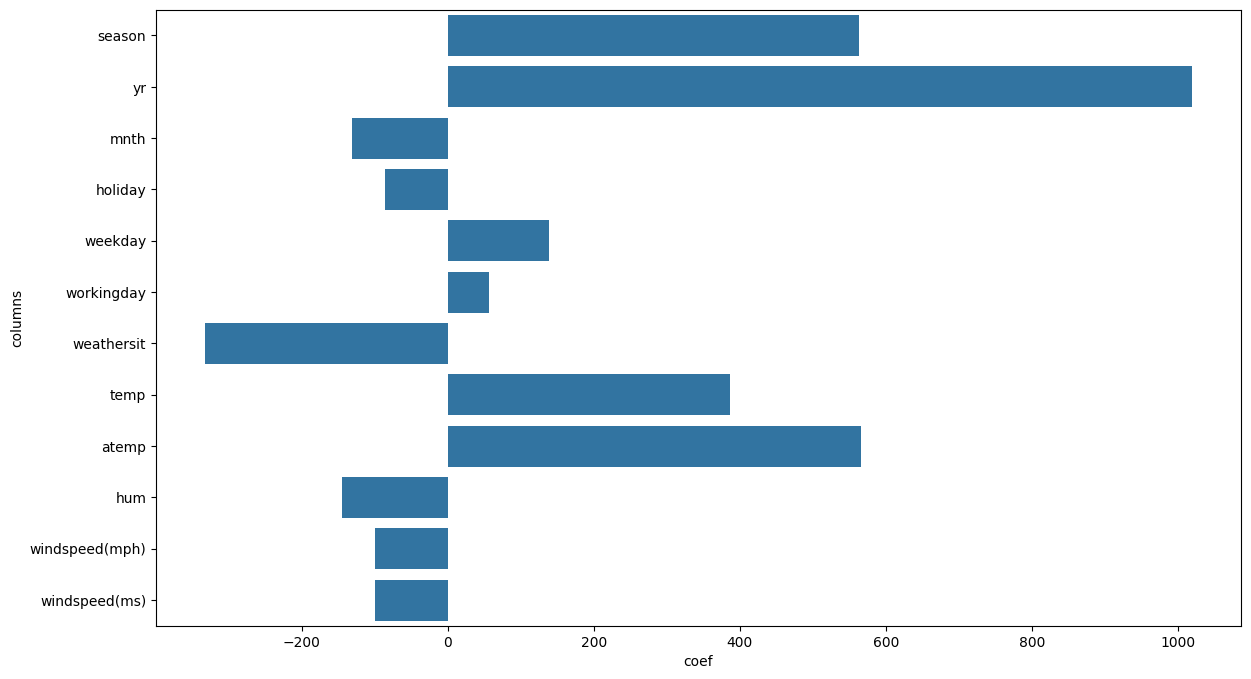

In [98]:
from sklearn.linear_model import Lasso, Ridge
ridge = Ridge()
ridge.fit(X, y)

for coef, col in sorted(zip(ridge.coef_, df.columns), key=lambda x: np.abs(x[0])):
    print("{} \t {}".format(np.round(coef, 4), col))
    
# Магнитуда признаков
plt.figure(figsize=(14,8))
sns.barplot(y='columns', x='coef',data=pd.DataFrame(list(zip(ridge.coef_, df.columns)), columns=["coef", "columns"]))
pass

-0.0 	 windspeed(ms)
55.2124 	 workingday
-86.1528 	 holiday
-128.7306 	 mnth
137.3479 	 weekday
-144.1292 	 hum
-197.1397 	 windspeed(mph)
-332.3699 	 weathersit
376.3632 	 temp
560.2416 	 season
576.5308 	 atemp
1019.4635 	 yr


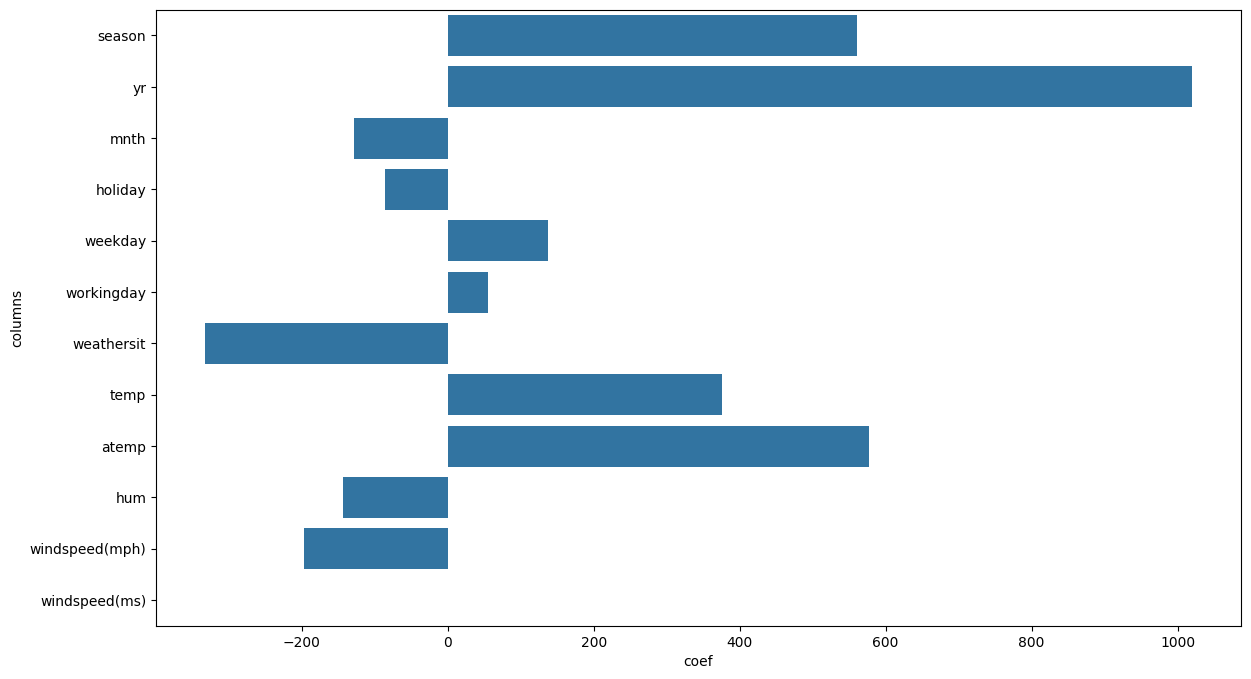

In [99]:
lasso = Lasso()
lasso.fit(X, y)

for coef, col in sorted(zip(lasso.coef_, df.columns), key=lambda x: np.abs(x[0])):
    print("{} \t {}".format(np.round(coef, 4), col))
    
plt.figure(figsize=(14,8))
sns.barplot(y='columns', x='coef',data=pd.DataFrame(list(zip(lasso.coef_, df.columns)), columns=["coef", "columns"]))
pass

Как мы видим, Lasso контролирует веса модели **обнуляя веса** при бесполезных признаках.  
Ridge просто **контролирует величину** коэффициентов. 


В любом случае регуляризатор просто вводит штрафы на очень большие веса $w$.

#### Коэффициент регуляризации

Посмотрим как изменение коэффициента регуляризации влияет на веса.

In [100]:
alphas = np.arange(1, 500, 5)
coefs_lasso = np.zeros((alphas.shape[0], X.shape[1])) # матрица весов размера (число регрессоров) x (число признаков)
coefs_ridge = np.zeros((alphas.shape[0], X.shape[1]))

i = 0
for alpha in alphas:
    lasso = Lasso(alpha = alpha, random_state=42)
    lasso.fit(X, y)
    coefs_lasso[i, :] = lasso.coef_
    
    ridge = Ridge(alpha = alpha, random_state=42)
    ridge.fit(X, y)
    coefs_ridge[i, :] = ridge.coef_
    
    i += 1

Text(0.5, 1.0, 'Ridge')

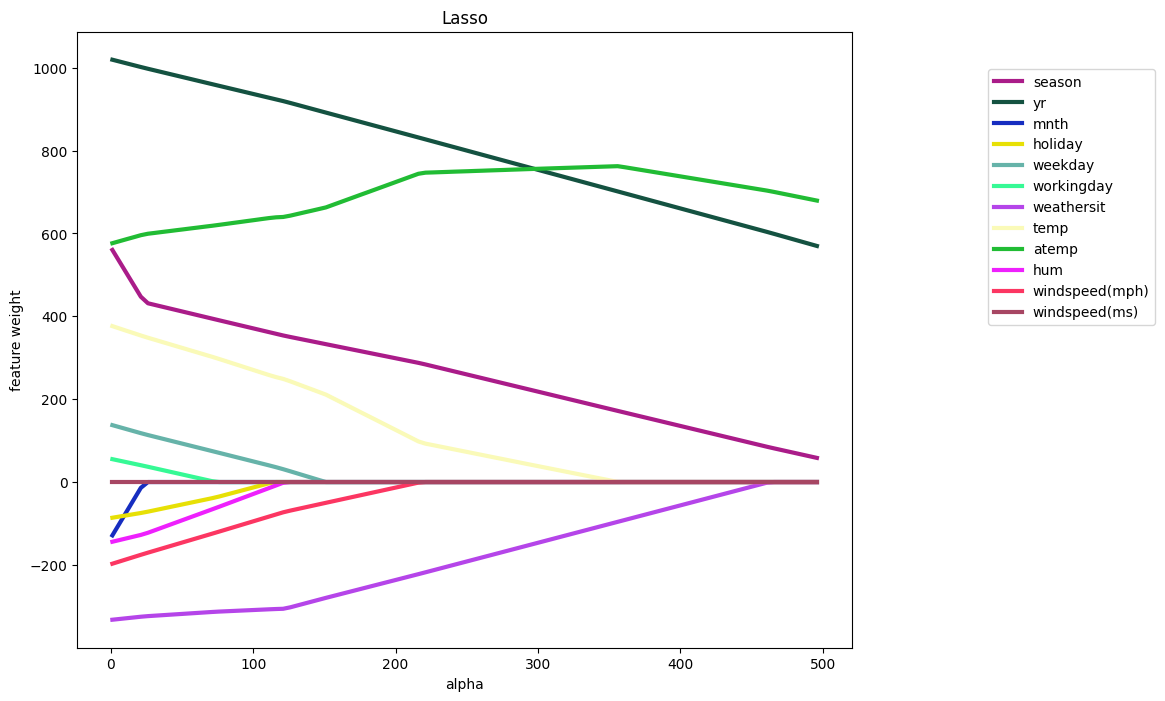

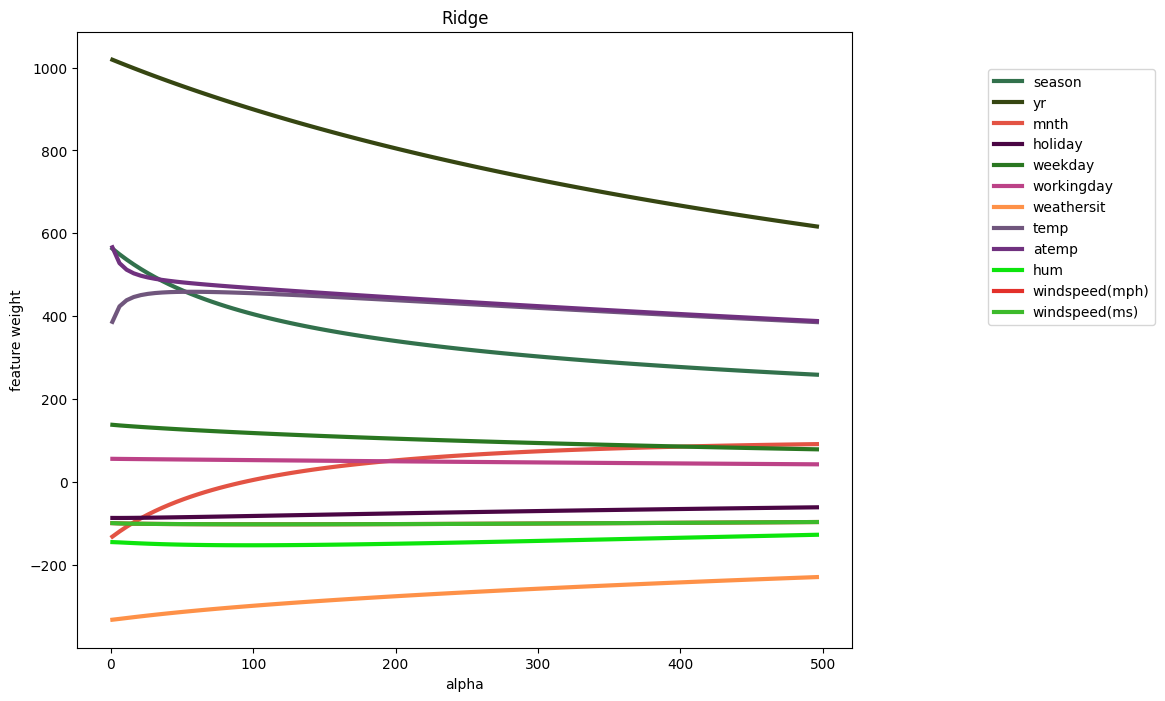

In [101]:
plt.figure(figsize=(10, 8))
for coef, feature in zip(coefs_lasso.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3), linewidth=3)
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Lasso")

plt.figure(figsize=(10, 8))
for coef, feature in zip(coefs_ridge.T, df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3), linewidth=3)
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")
plt.title("Ridge")

- Судя по графику Lasso($L_1$) агрессивнее уменьшает веса, чем Ridge($L_2$)
- В случае с $L_1$ регуляризатором, увеличение alpha сколлапсирует все веса в ноль. Это происходит из-за характера функции регуляризации. В $L_1$ - это $sum(|W|) * alpha$ в то время как в $L_2$ это $sum(W^2) * alpha$. Тогда $L_1$ слагамемое регуляризации будет больше чем слагаемое $L_2$ регуляризации. А оптимальное значение будет достигаться в 0. Кроме того $L_1$ производит отбор признаков, зануляя неинформативные.

### Выбор лучшего alpha

Итак, мы видим, что при изменении alpha модель по-разному подбирает коэффициенты признаков. Нам нужно выбрать наилучшее alpha.

Для этого, во-первых, нам нужна метрика качества. Будем использовать в качестве метрики сам оптимизируемый функционал метода наименьших квадратов, то есть _Mean Square Error_.

Во-вторых, нужно понять, на каких данных эту метрику считать. Нельзя выбирать alpha по значению MSE на обучающей выборке, потому что тогда мы не сможем оценить, как модель будет делать предсказания на новых для нее данных. Если мы выберем одно разбиение выборки на обучающую и тестовую (это называется holdout), то настроимся на конкретные "новые" данные, и вновь можем переобучиться. Поэтому будем делать несколько разбиений выборки, на каждом пробовать разные значения alpha, а затем усреднять MSE. Удобнее всего делать такие разбиения кросс-валидацией, то есть разделить выборку на K частей, или блоков, и каждый раз брать одну из них как тестовую, а из оставшихся блоков составлять обучающую выборку.

Делать кросс-валидацию для регрессии в sklearn совсем просто: для этого есть специальный регрессор, LassoCV, который берет на вход список из alpha и для каждого из них вычисляет MSE на кросс-валидации. После обучения (если оставить параметр `cv=3`) регрессор будет содержать переменную `mse_path_`, матрицу размера `len(alpha)` x `k`, `k = 3` (число блоков в кросс-валидации), содержащую значения MSE на тесте для соответствующих запусков. Кроме того, в переменной `alpha_` будет храниться выбранное значение параметра регуляризации, а в `coef_`, традиционно, обученные веса, соответствующие этому `alpha_`.

/home/le-moski/Documents/FEFU/7S/ML/02-ml-advanced/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21207409.53370869, tolerance: 220752.62533264962
  model = cd_fast.enet_coordinate_descent_gram(


alpha = 1.3035791583166332


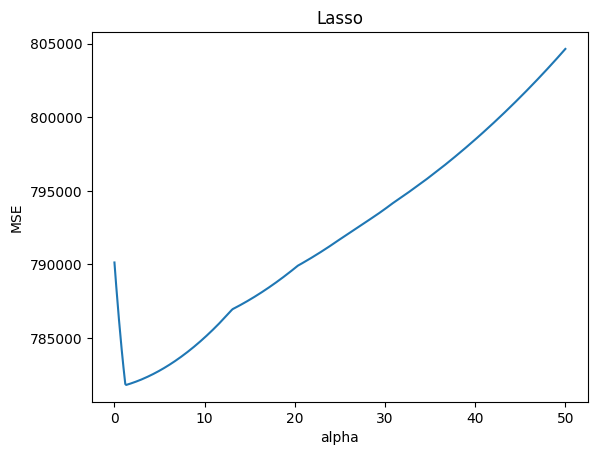

In [102]:
from sklearn.linear_model import LassoCV

alphas = np.linspace(0.001, 50, 500)
lasso_cv = LassoCV(alphas=alphas, random_state=42)
lasso_cv.fit(X, y)

mean_mse = np.mean(lasso_cv.mse_path_, axis = 1)

plt.plot(lasso_cv.alphas_, mean_mse)
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('Lasso')
print('alpha = {}'.format(lasso_cv.alpha_))

Посмотрим на значения коэффициентов при оптимальном alpha.

In [103]:
coef = pd.DataFrame(list(zip(np.round(lasso_cv.coef_, 2), df.columns)))
coef.columns = ['weight', 'feature']
coef.sort_values(['weight'], ascending=False)

,weight,feature
1,1019.20,yr
8,576.82,atemp
0,558.53,season
7,376.02,temp
4,137.05,weekday
5,54.99,workingday
11,-0.00,windspeed(ms)
3,-85.98,holiday
2,-126.99,mnth
9,-143.88,hum


После построения модели, подбора параметров и обучения наступает этап анализа результатов.  
На сколько хорошо модель строит предсказания, можно ли ей пользоваться, где она ошибается чаще всего? 

Для того, чтобы ответить на эти вопросы, мы сделаем следующее:

1. Проверим с помощью кросс валидации значение средней ошибки. Кросс валидация - это случайное разбиение выборки на части, обучение модели и вычисление средней точности модели.
2. Оценим долю ошибок
3. Визуализируем ошибки

### Кросс валидация

> Этот блок взят из курса ODS: https://habr.com/company/ods/blog/322534/

Главная задача обучаемых алгоритмов – их способность обобщаться, то есть хорошо работать на новых данных. Поскольку на новых данных мы сразу не можем проверить качество построенной модели (нам ведь надо для них сделать прогноз, то есть истинных значений целевого признака мы для них не знаем), то надо пожертвовать небольшой порцией данных, чтоб на ней проверить качество модели.


Чаще всего это делается одним из 2 способов:

- отложенная выборка (held-out/hold-out set). При таком подходе мы оставляем какую-то долю обучающей выборки (как правило от 20% до 40%), обучаем модель на остальных данных (60-80% исходной выборки) и считаем некоторую метрику качества модели (например, самое простое – долю правильных ответов в задаче классификации) на отложенной выборке.
- кросс-валидация (cross-validation, на русский еще переводят как скользящий или перекрестный контроль). Тут самый частый случай – K-fold кросс-валидация.

![image.png](https://habrastorage.org/files/b1d/706/e6c/b1d706e6c9df49c297b6152878a2d03f.png)

Тут модель обучается  раз на разных () подвыборках исходной выборки (белый цвет), а проверяется на одной подвыборке (каждый раз на разной, оранжевый цвет).
Получаются  оценок качества модели, которые обычно усредняются, выдавая среднюю оценку качества классификации/регрессии на кросс-валидации.


Кросс-валидация дает лучшую по сравнению с отложенной выборкой оценку качества модели на новых данных. Но кросс-валидация вычислительно дорогостоящая, если данных много.


Кросс-валидация – очень важная техника в машинном обучении (применяемая также в статистике и эконометрике), с ее помощью выбираются гиперпараметры моделей, сравниваются модели между собой, оценивается полезность новых признаков в задаче и т.д. Более подробно можно почитать, например, [тут у Sebastian Raschka](https://sebastianraschka.com/blog/2016/model-evaluation-selection-part1.html) или в любом классическом учебнике по машинному (статистическому) обучению.

In [104]:
from sklearn.model_selection import cross_val_score
cv = 3 # проведем 3 эксперимента
errors = cross_val_score(Lasso(lasso_cv.alpha_), X, y, cv=cv, scoring='neg_mean_absolute_error')
print(errors)
error = abs(np.mean(errors))
print("error={:0.3f}, std={:0.4f}".format(error, np.std(errors)))

# судя по отклонению модель получилась не очень стабильной

[-639.01564235 -656.88346539 -667.32475541]
error=654.408, std=11.6890


Но что вообще означает эта ошибка?

In [105]:
total_cnt = df.cnt.sum()
print("Прокатов было совершено за всё время", total_cnt)

Прокатов было совершено за всё время 3292679


In [106]:
"Доля ошибок: {:.2%}".format((error*X.shape[0]) / total_cnt)

'Доля ошибок: 14.53%'

### Визуализация ошибки регрессии

Интересно же посмотреть на графике где и как ошибается предсказание!

Для начала разобьем всю выборку на test и train. То есть на train сегменте мы будем обучать модель, а на test - проверять качество.

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("train_shape={}, test_shape={}".format(X_train.shape, X_test.shape))

reg = Lasso(lasso_cv.alpha_)
reg.fit(X_train, y_train)

pred = reg.predict(X_test)

train_shape=(548, 12), test_shape=(183, 12)


In [108]:
from sklearn.metrics import mean_squared_error

# Построим таблицу предсказание / оригинальное значение / MSE / MAE
prediction = pd.DataFrame(np.vstack((pred, y_test)).T, columns=["pred", "target"])
prediction['MSE'] = np.power(prediction['pred'] - prediction['target'], 2)
prediction['MAE'] = np.abs(prediction['pred'] - prediction['target'])

In [109]:
# Сортируем по убыванию ошибки
prediction.sort_values(by='MAE', ascending=False, inplace=True)
prediction.head()

,pred,target,MSE,MAE
61,6424.467433,3387.0,9.226208e+06,3037.467433
67,6154.399098,3846.0,5.328706e+06,2308.399098
137,5097.303594,2843.0,5.081885e+06,2254.303594
170,6071.479184,3910.0,4.671992e+06,2161.479184
76,7859.110905,5713.0,4.605792e+06,2146.110905


In [110]:
# Сортируем по возрастанию ошибки
prediction.sort_values(by='MAE', inplace=True)
prediction.head()

,pred,target,MSE,MAE
164,3961.477617,3956.0,30.004285,5.477617
19,7457.196432,7446.0,125.360093,11.196432
3,5095.881162,5084.0,141.162010,11.881162
84,2716.572490,2729.0,154.443013,12.427510
107,6221.383994,6234.0,159.163610,12.616006


In [111]:
print("общая ошибка предсказателя в количестве прокатов = {:0.1f}\nвсего прокатов = {:0.1f}\nдоля ошибок = {:.2%}"
      .format(prediction.MAE.sum(), prediction.target.sum(), prediction.MAE.sum() / prediction.target.sum()))

общая ошибка предсказателя в количестве прокатов = 119765.9
всего прокатов = 830519.0
доля ошибок = 14.42%


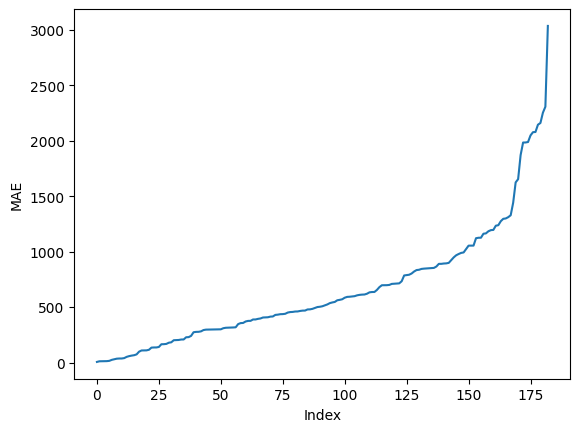

In [112]:
plt.plot(range(0, prediction.shape[0]), prediction['MAE'])
plt.xlabel("Index")
plt.ylabel("MAE")
pass

Финальная визуализация:  
На одном графике target и prediction. Точки отсортированы по величине ошибки.

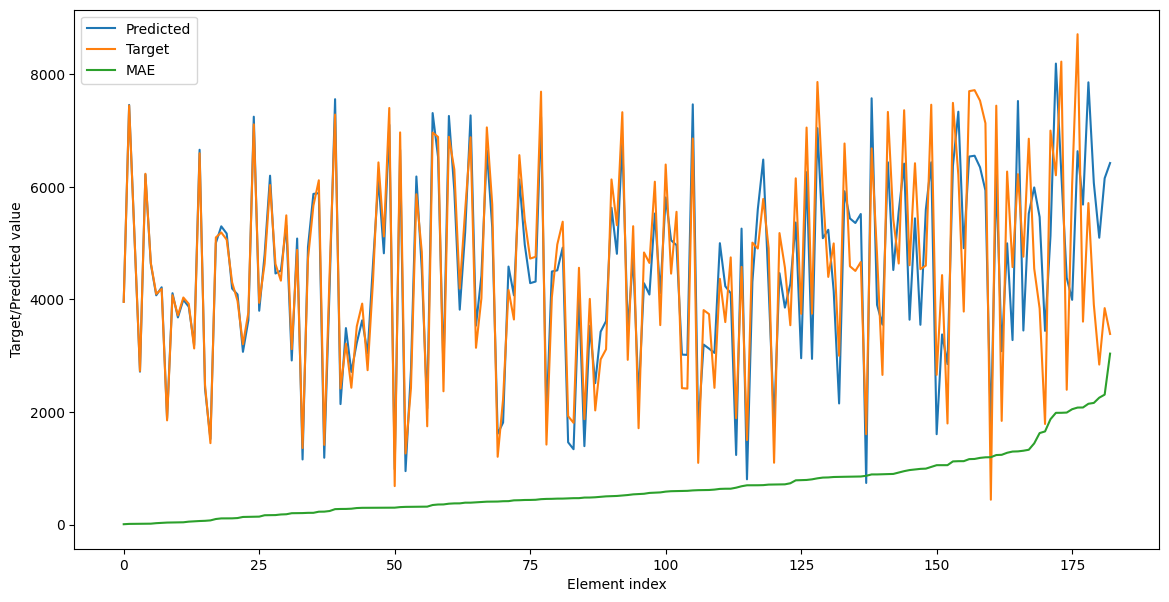

In [113]:
plt.figure(figsize=(14,7))

plt.plot(range(0, prediction.shape[0]), prediction['pred'])
plt.plot(range(0, prediction.shape[0]), prediction['target'])
plt.plot(range(0, prediction.shape[0]), prediction['MAE'])
plt.legend(["Predicted", "Target", "MAE"])

plt.xlabel("Element index")
plt.ylabel("Target/Predicted value")
pass

Вывод делайте сами, достаточно ли погрешности в 15% от всего проката или нет :)

## Бонус секция

Пример с полиномиальной регрессией и проблемой мультиколлинеарности, как было рассказано на лекции.

Взято из материалов мастеркласса Aiarlabs https://github.com/mephistopheies/mlworkshop39_042017.

In [114]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3):
    data = {}
    # create 1000 points uniformly distibuted in closed intervl from 0 to 2*pi
    # it is some kind of resolution for sampling
    data['support'] = np.linspace(0, 2*np.pi, num=n_support)
    # calculate sine values
    data['values'] = np.sin(data['support']) + 1
    # choose n_train random vakues from support (with replacement) and sort them ascending
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    # calculate sine for each of samplesd point
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data

Shape of X is (25,)
Head of X is [0.44026323 0.7987633  1.43400025 1.60381607 1.78621084 1.92457928
 2.20760565 2.39628989 2.71705311 2.76107943]


/tmp/ipykernel_10128/4192749426.py:10: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')


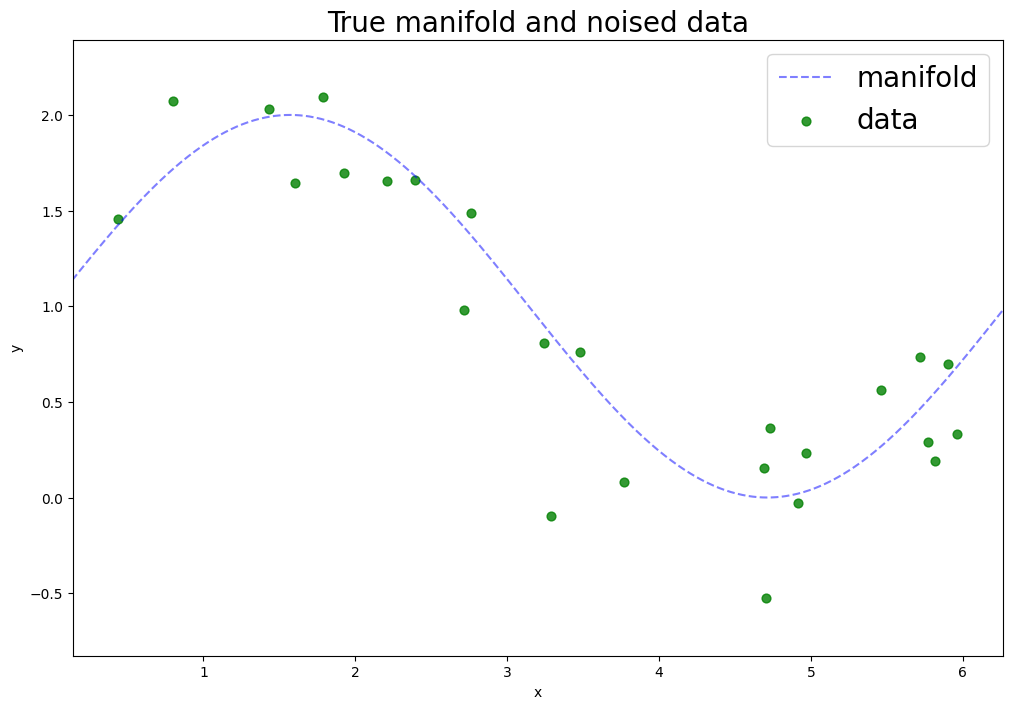

In [115]:
# sample 25 points from 1000 available from noised sin manifold 
data = generate_wave_set(1000, 25)

print('Shape of X is', data['x_train'].shape)
print('Head of X is', data['x_train'][:10])

margin = 0.3
plt.figure(figsize=(12, 8))
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('True manifold and noised data', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

/tmp/ipykernel_10128/3626952434.py:11: MatplotlibDeprecationWarning: Passing the marker parameter of scatter() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')


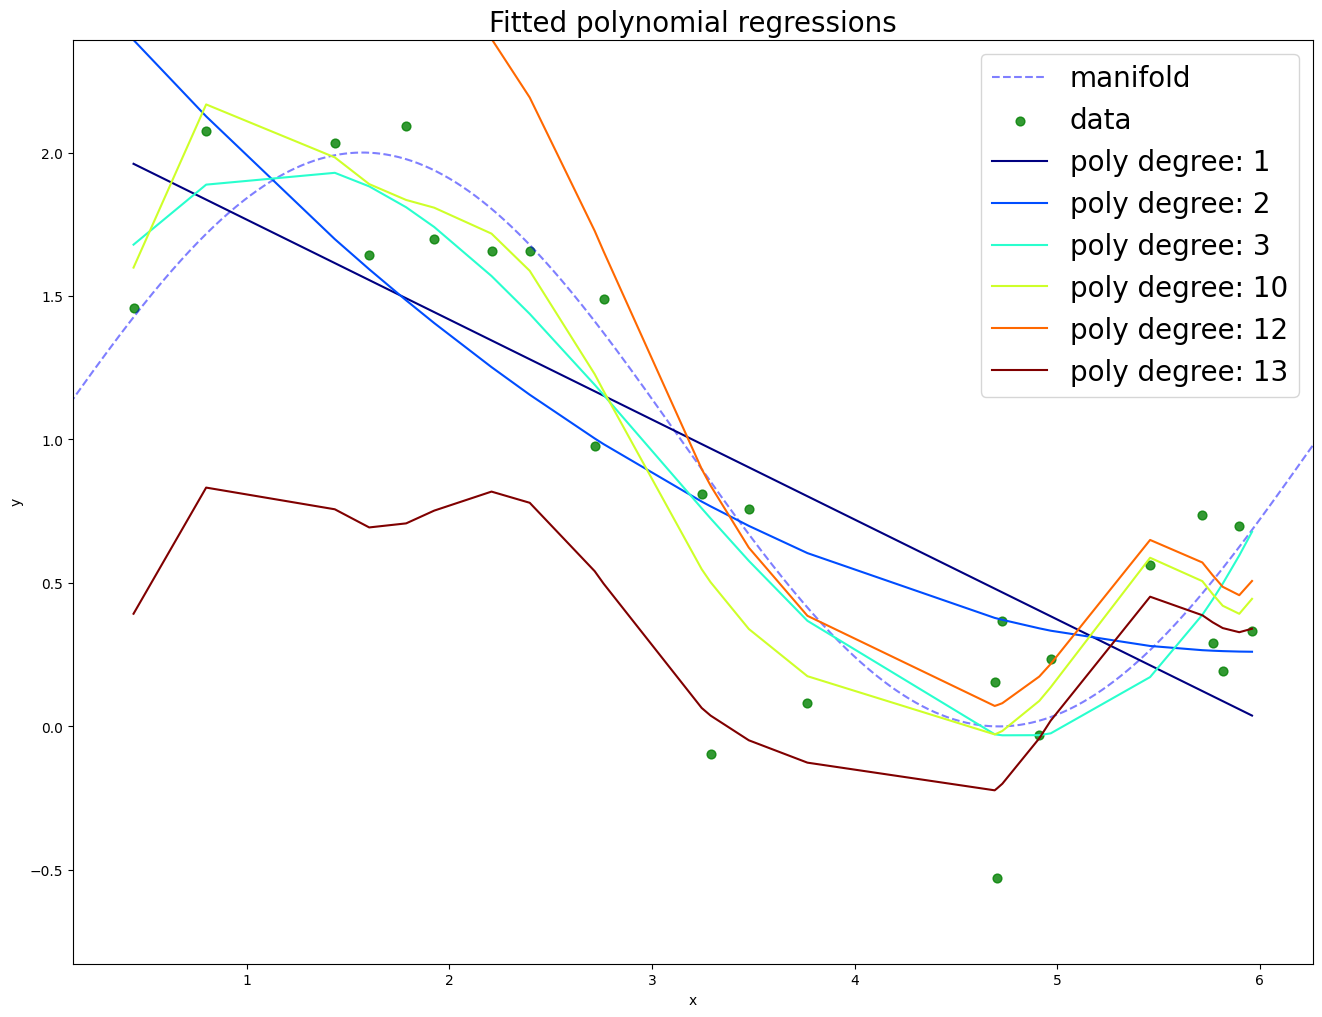

In [117]:
# define list with degrees of polynomials to investigate
degree_list = [1, 2, 3, 10, 12, 13]
# get color palette
cmap = plt.get_cmap('jet')
# compute individual color for each curve
colors = [cmap(i) for i in np.linspace(0, 1, len(degree_list))]

margin = 0.3
plt.figure(figsize=(16, 12))
plt.plot(data['support'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

# save weights of all fitted polynomial regressions
w_list = []
err = []
for ix, degree in enumerate(degree_list):
    # list with polynomial features for each degree
    dlist = [np.ones(data['x_train'].shape[0])] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
    X = np.array(dlist).T
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), data['y_train'])
    w_list.append((degree, w))
    y_hat = np.dot(w, X.T)
    err.append(np.mean((data['y_train'] - y_hat)**2))
    plt.plot(data['x_train'], y_hat, color=colors[ix], label='poly degree: %i' % degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show()